# Grupo 6:
* Ailton José Rodrigues - ajr@cin.ufpe.br
* Aluisio José Pereira - ajp3@cin.ufpe.br
* Maria Katarine Santana Barbosa - mksb@cin.ufpe.br

Disciplina: IN1102 - Aprendizagem de Máquina (2021.2)\
Professor: Francisco de Assis Tenório de Carvalho\
Atividade: Projeto da disciplina

# Importes e permissões

In [ ]:
# Imports
import pandas as pd
from google.colab import drive
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=False)

!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local

!conda install -y --prefix /usr/local -c plotly plotly 
!conda install -y --prefix /usr/local -c plotly plotly-orca
!conda install -y --prefix /usr/local -c plotly plotly_express 

import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

import plotly
from plotly import graph_objs as go
!conda update -y -n base conda 
!conda install -y -c plotly/label/test plotly 

plotly.__version__

import warnings
# ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# utilities  
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from collections import Counter
import numpy as np
import os
import argparse
import sys

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# ML tools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix

# for decision tree graph generation
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# gerar gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# criar imagens
if not os.path.exists("images"):
    os.mkdir("images")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 - Compreensão do problema

# 2 - Compreensão dos Dados

1. `region-centroid-col`: a coluna do pixel central da região.
2. `region-centroid-row`: a linha do pixel central da região.
3. `region-pixel-count`: o número de pixels em uma região = 9.
4. `short-line-density-5`: os resultados de um algoritmo de extração de linha que conta quantas linhas de comprimento 5 (qualquer orientação com baixo contraste, menor ou igual a 5, percorre a região.
5. `short-line-density-2`: o mesmo que densidade da linha curta-5, mas conta as linhas de alto contraste, maior que 5.
6. `vedge-mean`: medir o contraste horizontalmente pixels adjacentes na região. Existem 6, a média e o desvio padrão é fornecido. Este atributo é usado como um detector de borda vertical.
7. `vegde-sd`: (ver 6)
8. `hedge-mean`: mede o contraste verticalmente adjacente píxeis. Usado para detecção de linha horizontal.
9. `hedge-sd`: (ver 8).
10. `intensity-mean`: a média sobre a região de (R + G + B) / 3
11. `rawred-mean`: a média sobre a região do valor R.
12. `rawblue-mean`: a média sobre a região do valor B.
13. `rawgreen-mean`: a média sobre a região do valor G.
14. `exred-mean`: medir o excesso de vermelho: (2R - (G + B))
15. `exblue-mean`: medir o excesso de azul: (2B - (G + R))
16. `exgreen-mean`: medir o excesso de verde: (2G - (R + B))
17. `value-mean`: transformação não linear 3-d de RGB. (O algoritmo pode ser encontrado em Foley e VanDam, Fundamentos de Computação Gráfica Interativa)
18. `saturatoin-mean`: (ver 17)
19. `hue-mean`: (ver 17)

`CLASSE`: brickface, sky, foliage, cement, window, path, grass

# 3 - Preparação dos Dados

Dados [Image Segmentation](https://archive.ics.uci.edu/ml/datasets/Image+Segmentation)

In [ ]:
#Arquivo de entrada da base de dados
!wget "https://drive.google.com/uc?export=download&id=1RYHxYDY0t1yHYq0izI8WijJ2vC-kWs6c" -O "segmentation.csv" -
!conda update -y -n base conda

In [6]:
#Leitura dos dados
data = pd.read_csv("segmentation.csv",  sep=",")
data.head()

,CLASSE,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


## Primeiro banco de dados [classe + variável 4 a 9 (shape)]

In [7]:
#Separação da base de dados da var04 a var09 (shape)
db1 = data.iloc[:, [0,4,5,6,7,8,9]]
db1.to_csv('db1.csv')
db1.head()

,CLASSE,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD
0,BRICKFACE,0.0,0.0,0.277778,0.062963,0.666667,0.311111
1,BRICKFACE,0.0,0.0,0.333333,0.266667,0.500000,0.077778
2,BRICKFACE,0.0,0.0,0.277778,0.107407,0.833333,0.522222
3,BRICKFACE,0.0,0.0,0.500000,0.166667,1.111111,0.474074
4,BRICKFACE,0.0,0.0,0.722222,0.374074,0.888889,0.429629


In [9]:
db1.describe()

,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.008466,0.006349,1.925132,5.719529,2.604233,11.638377
std,0.029549,0.030077,3.158211,43.495942,4.798268,97.390023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.666667,0.400921,0.777779,0.410816
50%,0.000000,0.000000,1.222222,0.828695,1.388889,0.913176
75%,0.000000,0.000000,1.888890,1.676634,2.597221,1.980485
max,0.111111,0.222222,25.500000,572.996400,44.722225,1386.329200


In [17]:
db1.isnull().sum()

CLASSE                  0
SHORT-LINE-DENSITY-5    0
SHORT-LINE-DENSITY-2    0
VEDGE-MEAN              0
VEDGE-SD                0
HEDGE-MEAN              0
HEDGE-SD                0
dtype: int64

In [18]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLASSE                210 non-null    object 
 1   SHORT-LINE-DENSITY-5  210 non-null    float64
 2   SHORT-LINE-DENSITY-2  210 non-null    float64
 3   VEDGE-MEAN            210 non-null    float64
 4   VEDGE-SD              210 non-null    float64
 5   HEDGE-MEAN            210 non-null    float64
 6   HEDGE-SD              210 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.6+ KB


In [24]:
db1['CLASSE'].value_counts()

FOLIAGE      30
SKY          30
GRASS        30
CEMENT       30
BRICKFACE    30
WINDOW       30
PATH         30
Name: CLASSE, dtype: int64

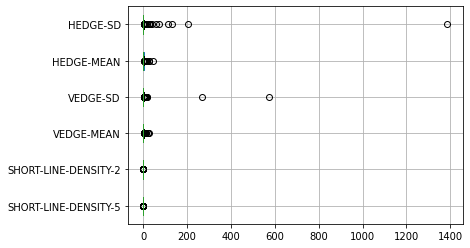

In [ ]:
# antes de usar os dados precisa normalizando o banco de dados
db1.boxplot(vert=False)
plt.show()

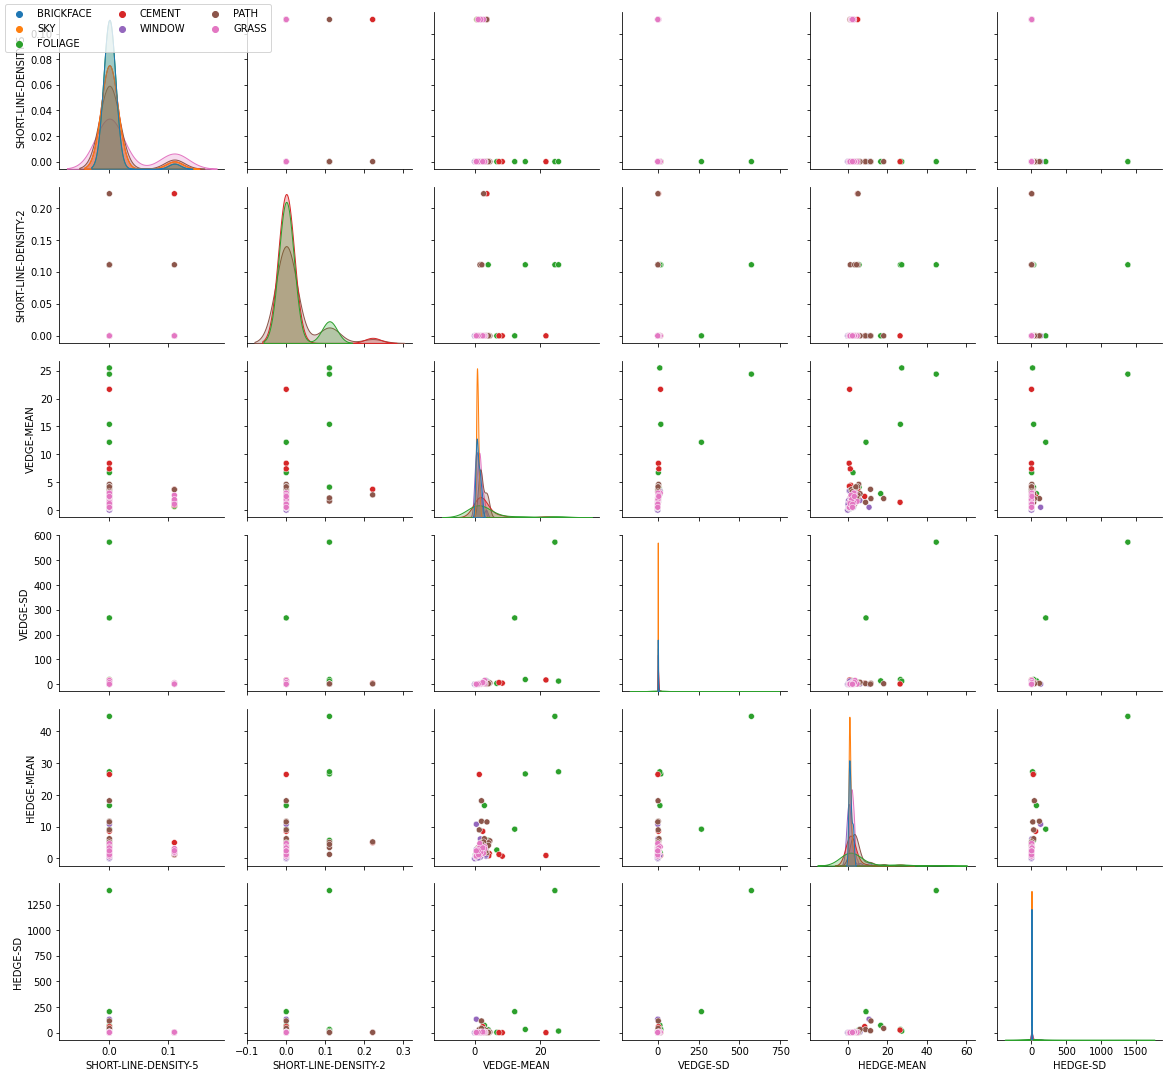

In [ ]:
# Gráfico de disperssão-correlação dos atributos do primeiro banco
g = sns.pairplot(db1, hue='CLASSE')
handles = g._legend_data.values()
labels = g._legend_data.keys()
g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=3)
plt.tight_layout()

##Segundo banco de dados [classe + variável 10 a 19 (rgb)]

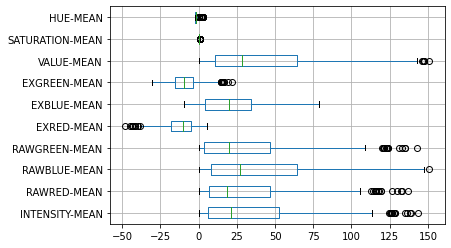

In [11]:
#Separação da base de dados da var10 a var19 (rgb)
db2 = data.iloc[:, [0,10,11,12,13,14,15,16,17,18,19]]
db2.to_csv('db2.csv')
db2.head()
db2.boxplot(vert=False )
plt.show()

In [12]:
db2.describe()

,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230,-1.340397
std,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333,1.559405
min,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000,-2.530950
25%,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722,-2.187112
50%,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455,-2.044163
75%,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738,-1.429800
max,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000,2.864931


In [16]:
db2.isnull().sum()

CLASSE             0
INTENSITY-MEAN     0
RAWRED-MEAN        0
RAWBLUE-MEAN       0
RAWGREEN-MEAN      0
EXRED-MEAN         0
EXBLUE-MEAN        0
EXGREEN-MEAN       0
VALUE-MEAN         0
SATURATION-MEAN    0
HUE-MEAN           0
dtype: int64

In [21]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CLASSE           210 non-null    object 
 1   INTENSITY-MEAN   210 non-null    float64
 2   RAWRED-MEAN      210 non-null    float64
 3   RAWBLUE-MEAN     210 non-null    float64
 4   RAWGREEN-MEAN    210 non-null    float64
 5   EXRED-MEAN       210 non-null    float64
 6   EXBLUE-MEAN      210 non-null    float64
 7   EXGREEN-MEAN     210 non-null    float64
 8   VALUE-MEAN       210 non-null    float64
 9   SATURATION-MEAN  210 non-null    float64
 10  HUE-MEAN         210 non-null    float64
dtypes: float64(10), object(1)
memory usage: 18.2+ KB


In [23]:
db2['CLASSE'].value_counts()

FOLIAGE      30
SKY          30
GRASS        30
CEMENT       30
BRICKFACE    30
WINDOW       30
PATH         30
Name: CLASSE, dtype: int64

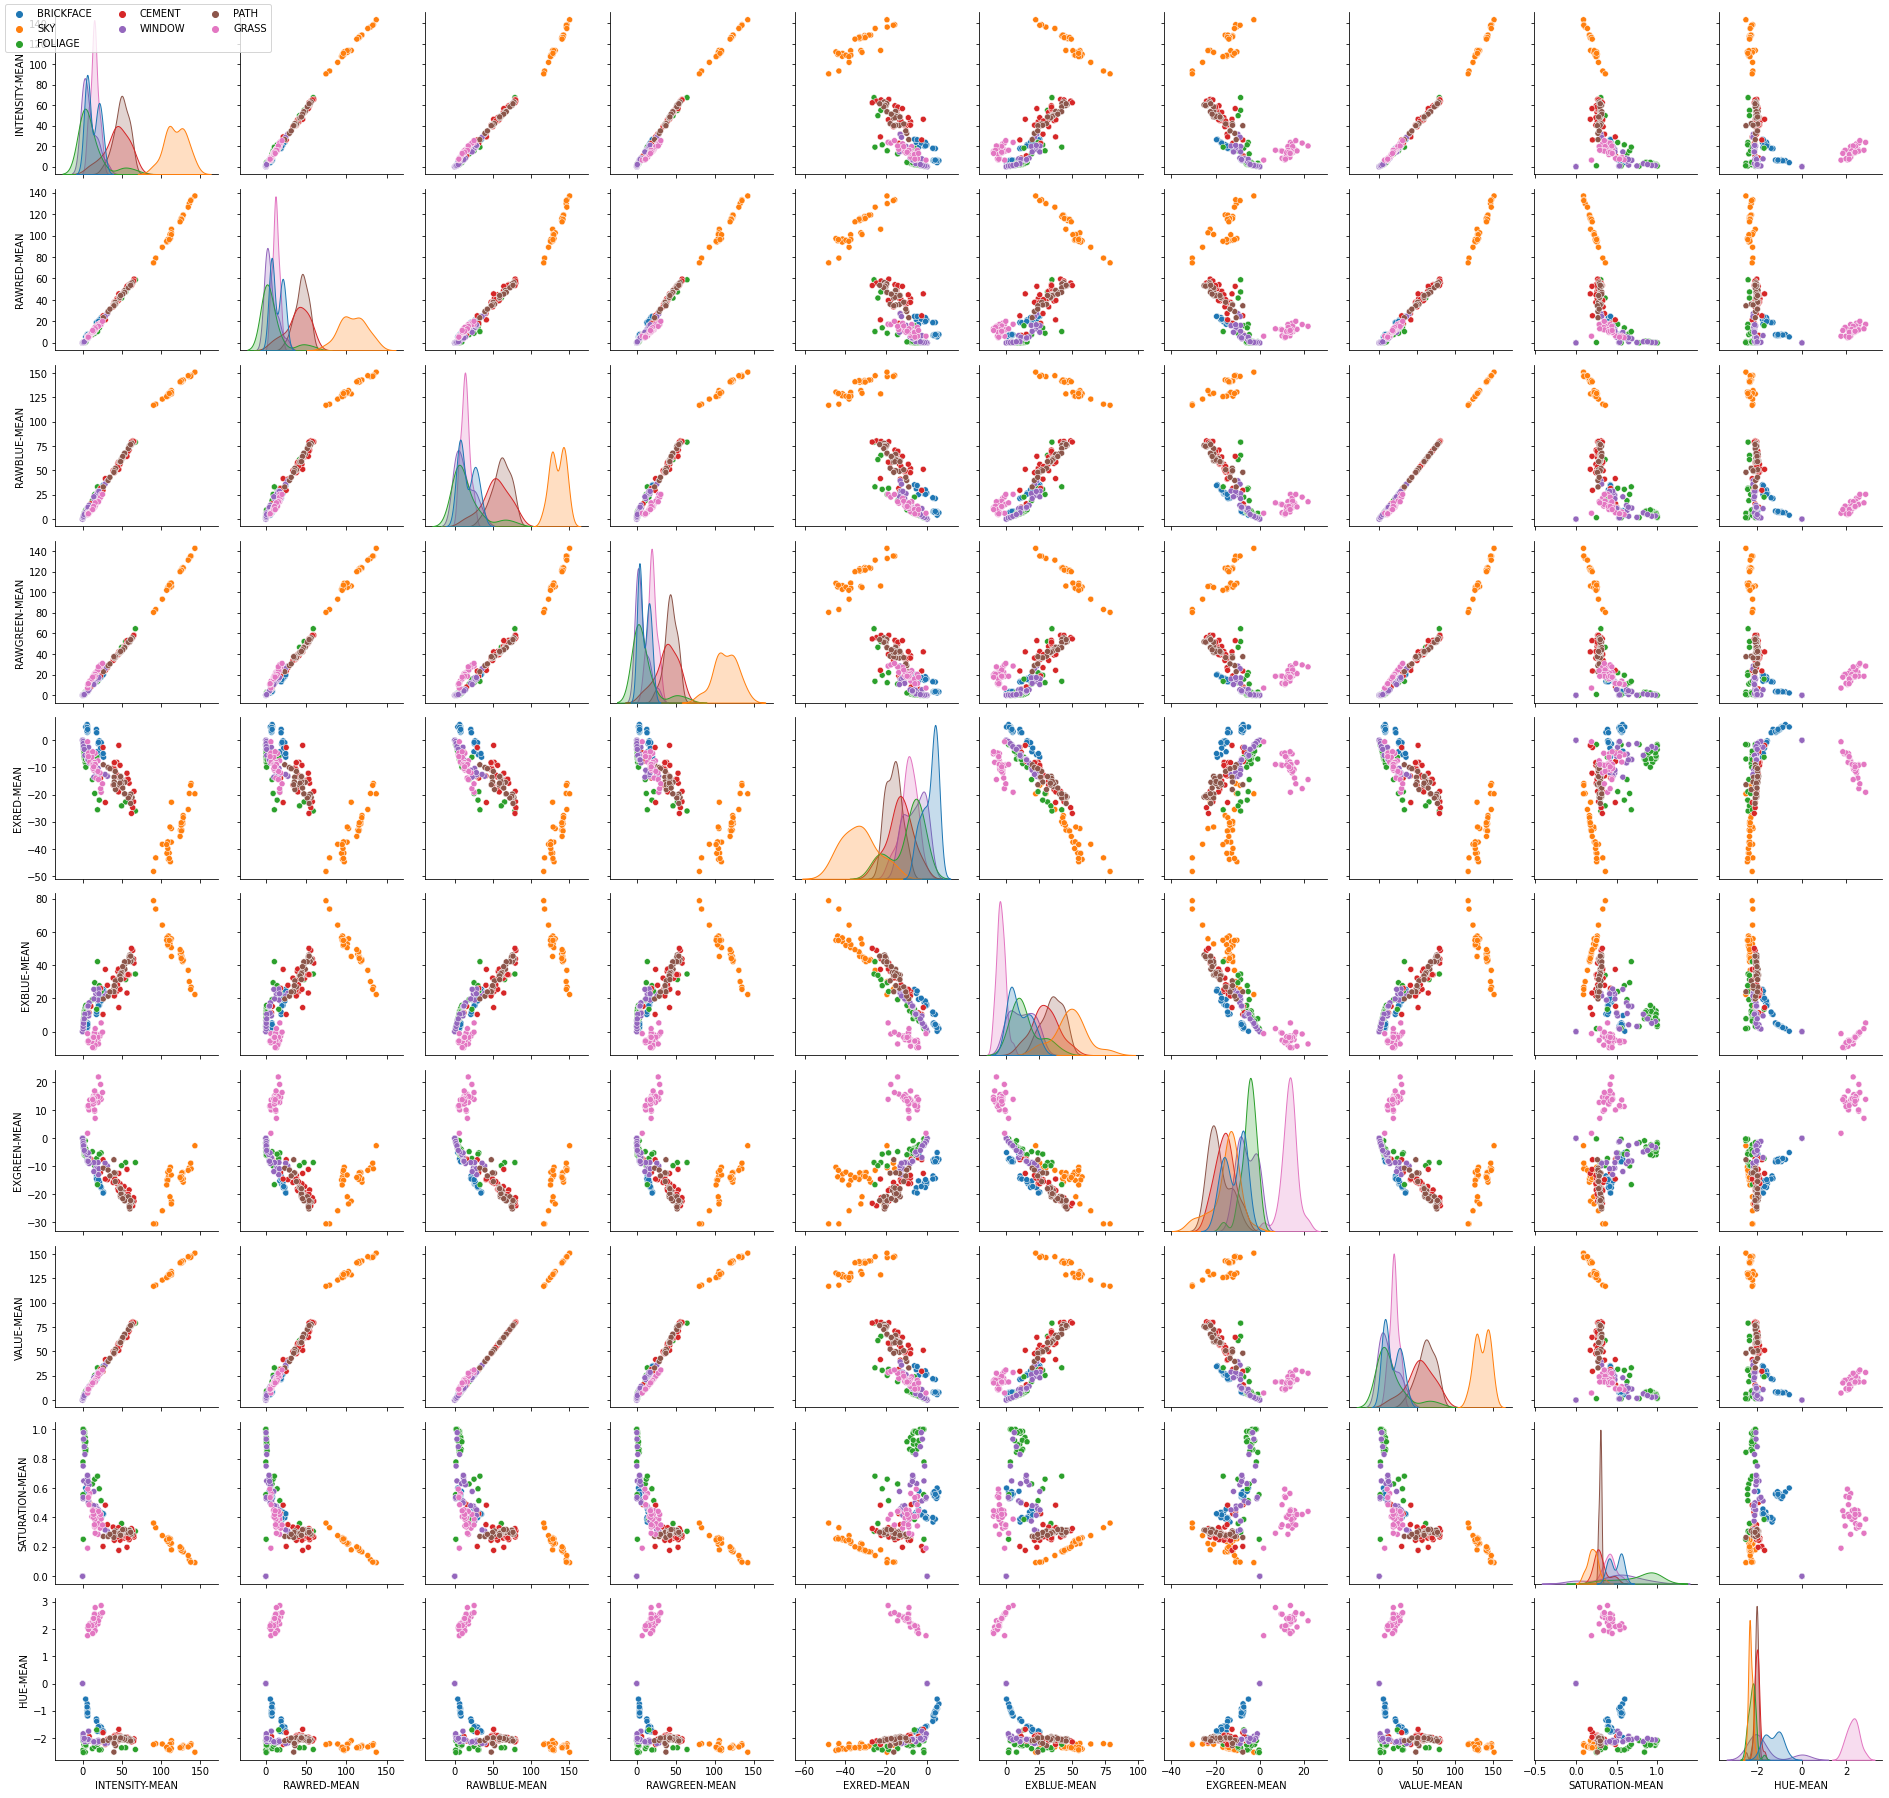

In [ ]:
# Gráfico de disperssão-correlação dos atributos do segundo banco
g = sns.pairplot(db2, hue='CLASSE')
handles = g._legend_data.values()
labels = g._legend_data.keys()
g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=3)
plt.tight_layout()

## Terceiro banco de dados [classe + variável 4 a 19 (shape+rgb)]

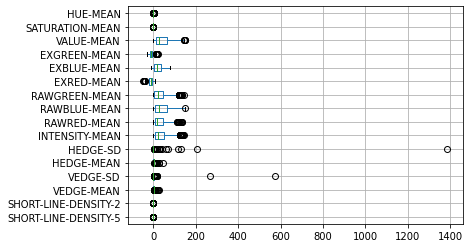

In [13]:
#Separação da base de dados da var04 a var19 (shape+rgb)
db3 = data.iloc[:, [0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
db3.to_csv('db3.csv')
db3.head()
db3.boxplot(vert=False)
plt.show()

In [14]:
db3.describe()

,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.008466,0.006349,1.925132,5.719529,2.604233,11.638377,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230,-1.340397
std,0.029549,0.030077,3.158211,43.495942,4.798268,97.390023,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333,1.559405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000,-2.530950
25%,0.000000,0.000000,0.666667,0.400921,0.777779,0.410816,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722,-2.187112
50%,0.000000,0.000000,1.222222,0.828695,1.388889,0.913176,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455,-2.044163
75%,0.000000,0.000000,1.888890,1.676634,2.597221,1.980485,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738,-1.429800
max,0.111111,0.222222,25.500000,572.996400,44.722225,1386.329200,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000,2.864931


In [15]:
db3.isnull().sum()

CLASSE                  0
SHORT-LINE-DENSITY-5    0
SHORT-LINE-DENSITY-2    0
VEDGE-MEAN              0
VEDGE-SD                0
HEDGE-MEAN              0
HEDGE-SD                0
INTENSITY-MEAN          0
RAWRED-MEAN             0
RAWBLUE-MEAN            0
RAWGREEN-MEAN           0
EXRED-MEAN              0
EXBLUE-MEAN             0
EXGREEN-MEAN            0
VALUE-MEAN              0
SATURATION-MEAN         0
HUE-MEAN                0
dtype: int64

In [20]:
db3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLASSE                210 non-null    object 
 1   SHORT-LINE-DENSITY-5  210 non-null    float64
 2   SHORT-LINE-DENSITY-2  210 non-null    float64
 3   VEDGE-MEAN            210 non-null    float64
 4   VEDGE-SD              210 non-null    float64
 5   HEDGE-MEAN            210 non-null    float64
 6   HEDGE-SD              210 non-null    float64
 7   INTENSITY-MEAN        210 non-null    float64
 8   RAWRED-MEAN           210 non-null    float64
 9   RAWBLUE-MEAN          210 non-null    float64
 10  RAWGREEN-MEAN         210 non-null    float64
 11  EXRED-MEAN            210 non-null    float64
 12  EXBLUE-MEAN           210 non-null    float64
 13  EXGREEN-MEAN          210 non-null    float64
 14  VALUE-MEAN            210 non-null    float64
 15  SATURATION-MEAN       2

In [22]:
db3['CLASSE'].value_counts()

FOLIAGE      30
SKY          30
GRASS        30
CEMENT       30
BRICKFACE    30
WINDOW       30
PATH         30
Name: CLASSE, dtype: int64

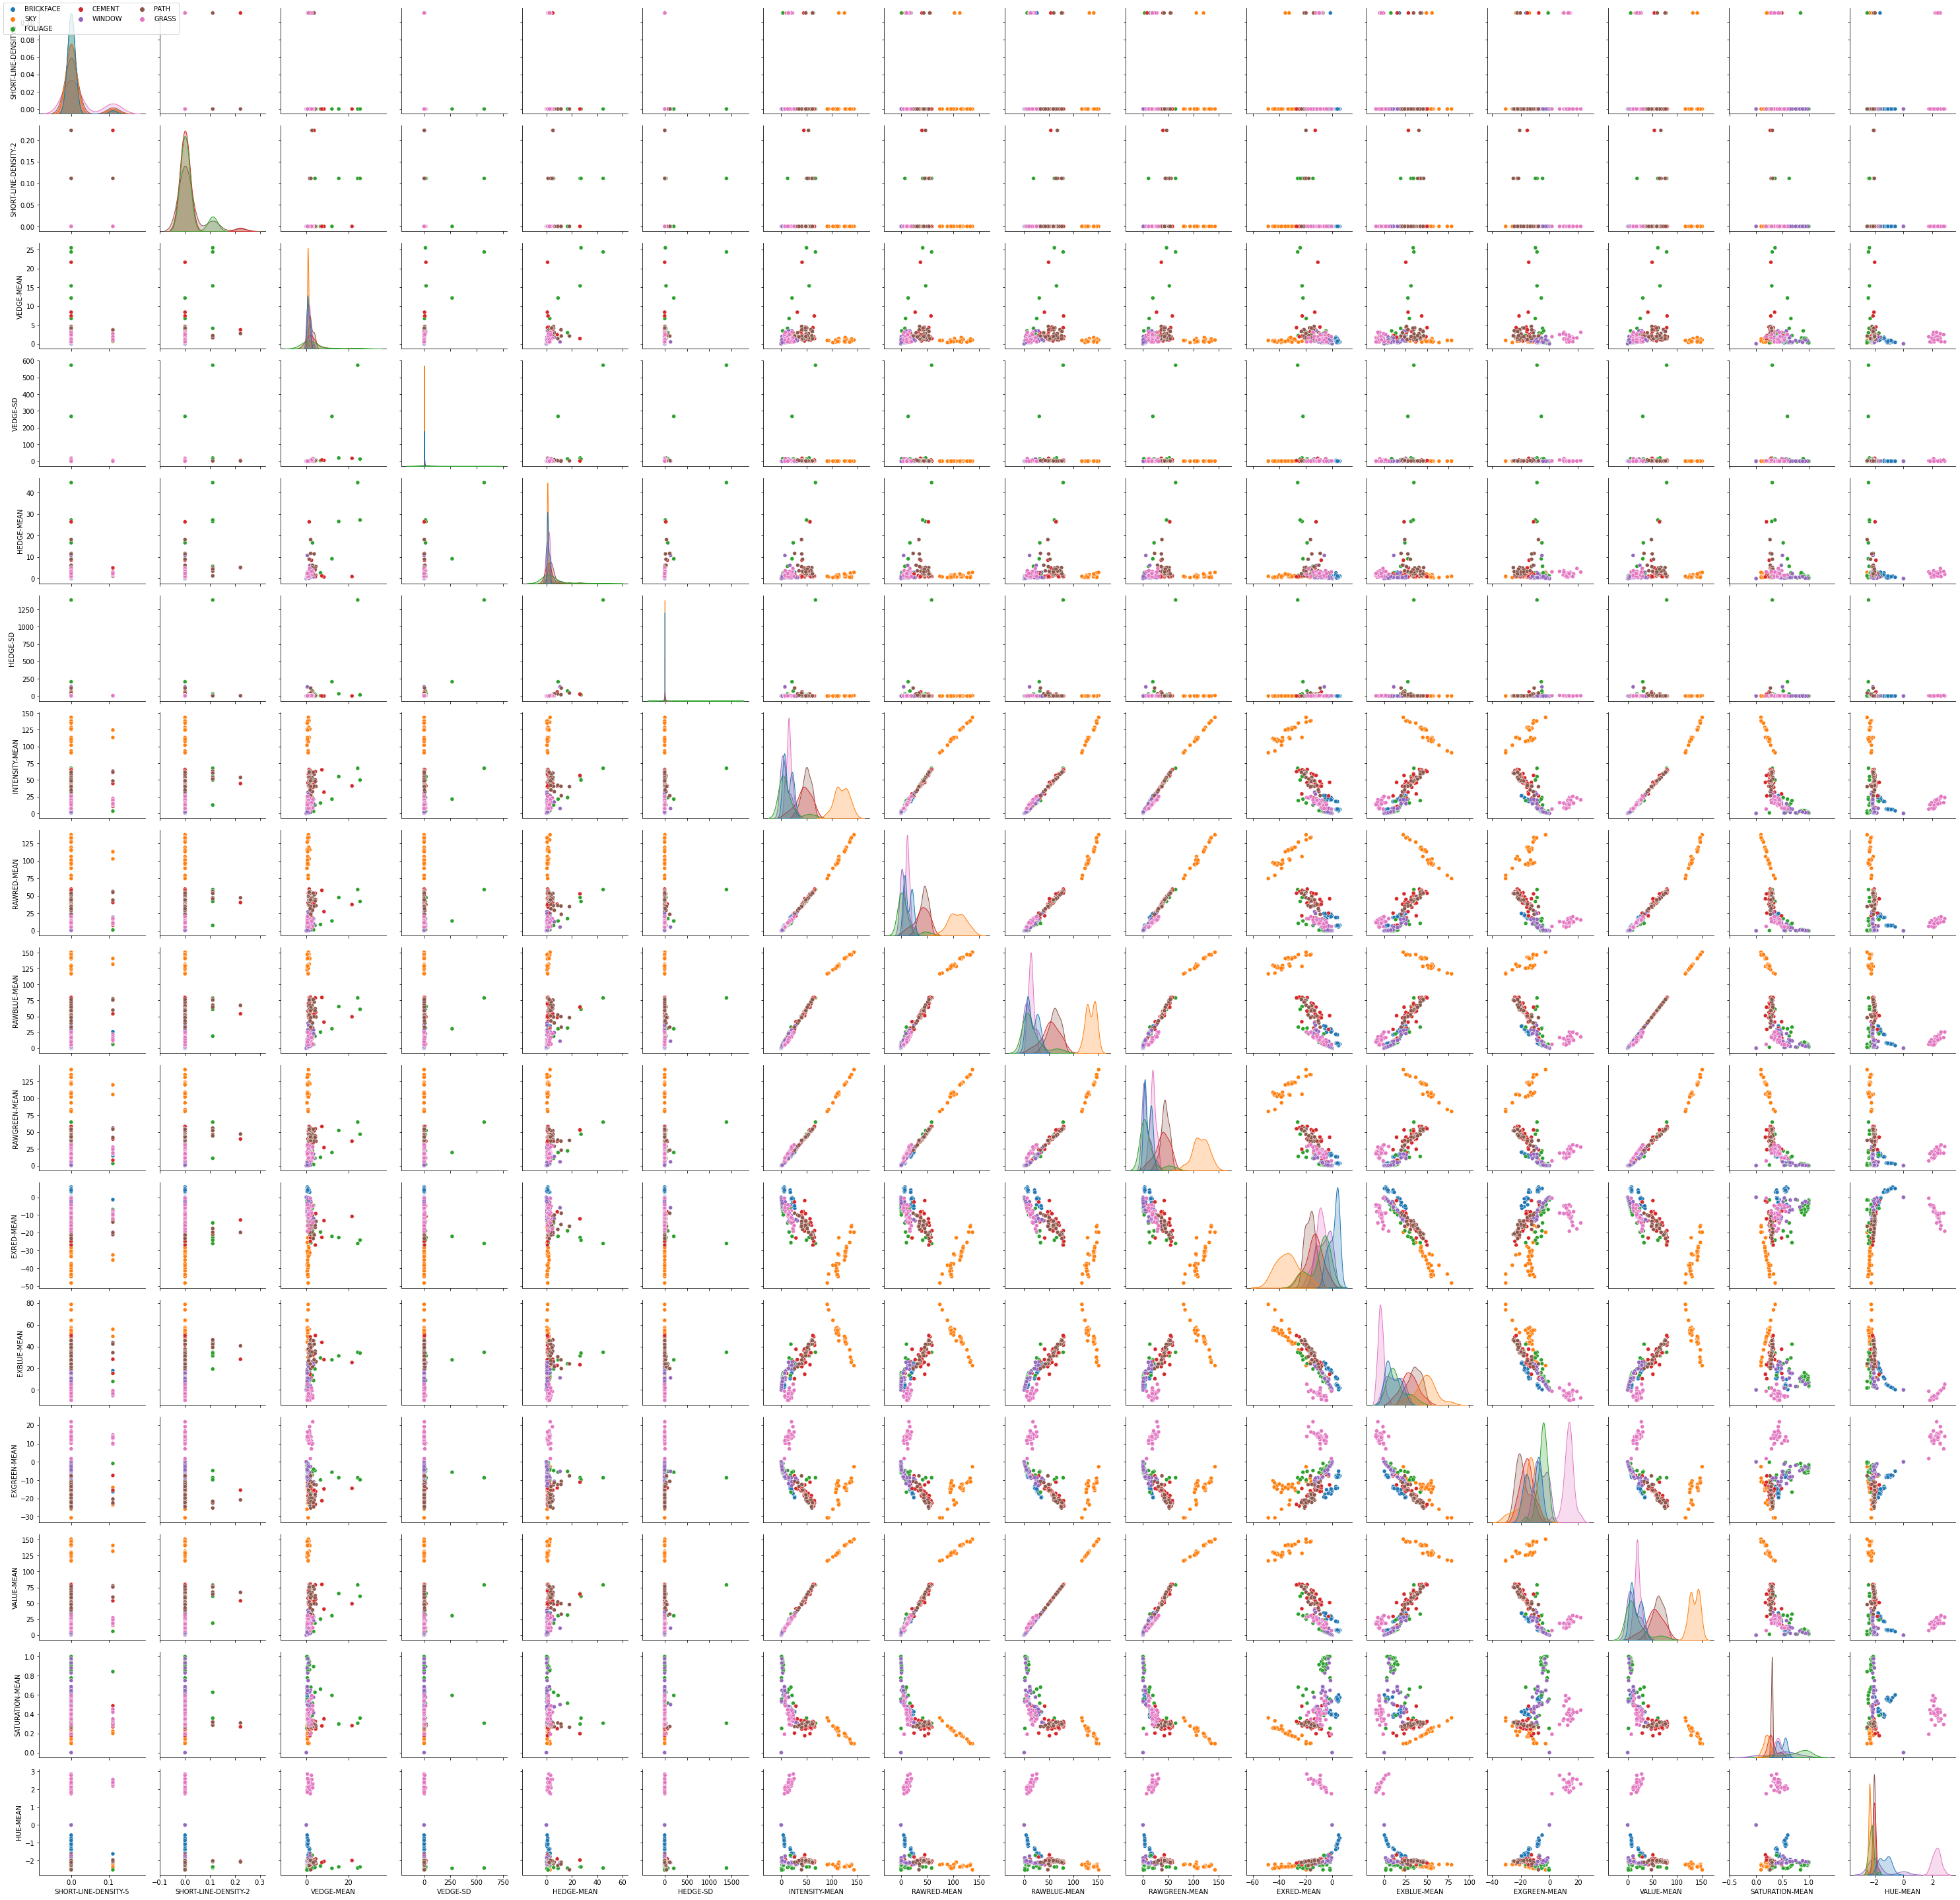

In [ ]:
# Gráfico de disperssão-correlação dos atributos do terceiro banco
g = sns.pairplot(db3, hue='CLASSE')
handles = g._legend_data.values()
labels = g._legend_data.keys()
g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=3)
plt.tight_layout()